In [1]:
# Import necessary libraries
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.compose import *
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import *
from sklearn.model_selection import *
from joblib import dump
from sklearn.discriminant_analysis import *
from sklearn.preprocessing import *
from sklearn.neighbors import *
from sklearn.naive_bayes import *
from sklearn.pipeline import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import *
import os

warnings.simplefilter('ignore')

os.chdir('D:\Kaggle_Compititions\Smoking\playground-series-s3e24')

bank = pd.read_csv('train.csv',index_col=0)
bank

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,87,93,10.9,1,0.6,15,9,12,0,0


In [2]:
# Drop the 'smoking' column from the bank dataset and assign the remaining columns to x
x = bank.drop(['smoking'], axis=1)

# Assign the 'smoking' column from the bank dataset to y
y = bank['smoking']

In [3]:
# Split the dataset into training and testing sets
# x and y are the feature and target variables, respectively
# test_size=0.3 means 30% of the data will be used for testing
# stratify=y ensures the class distribution in the training and testing sets is the same as the original dataset
# random_state=24 sets the random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=24)

# Create a Decision Tree Classifier model
# random_state=24 sets the random seed for reproducibility
# max_depth=3 limits the maximum depth of the decision tree to 3 levels
# min_samples_leaf=20 sets the minimum number of samples required to be at a leaf node to 20
dtc = DecisionTreeClassifier(random_state=24, max_depth=3, min_samples_leaf=20)

# Train the Decision Tree Classifier model on the training data
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=24)

# Tree plot

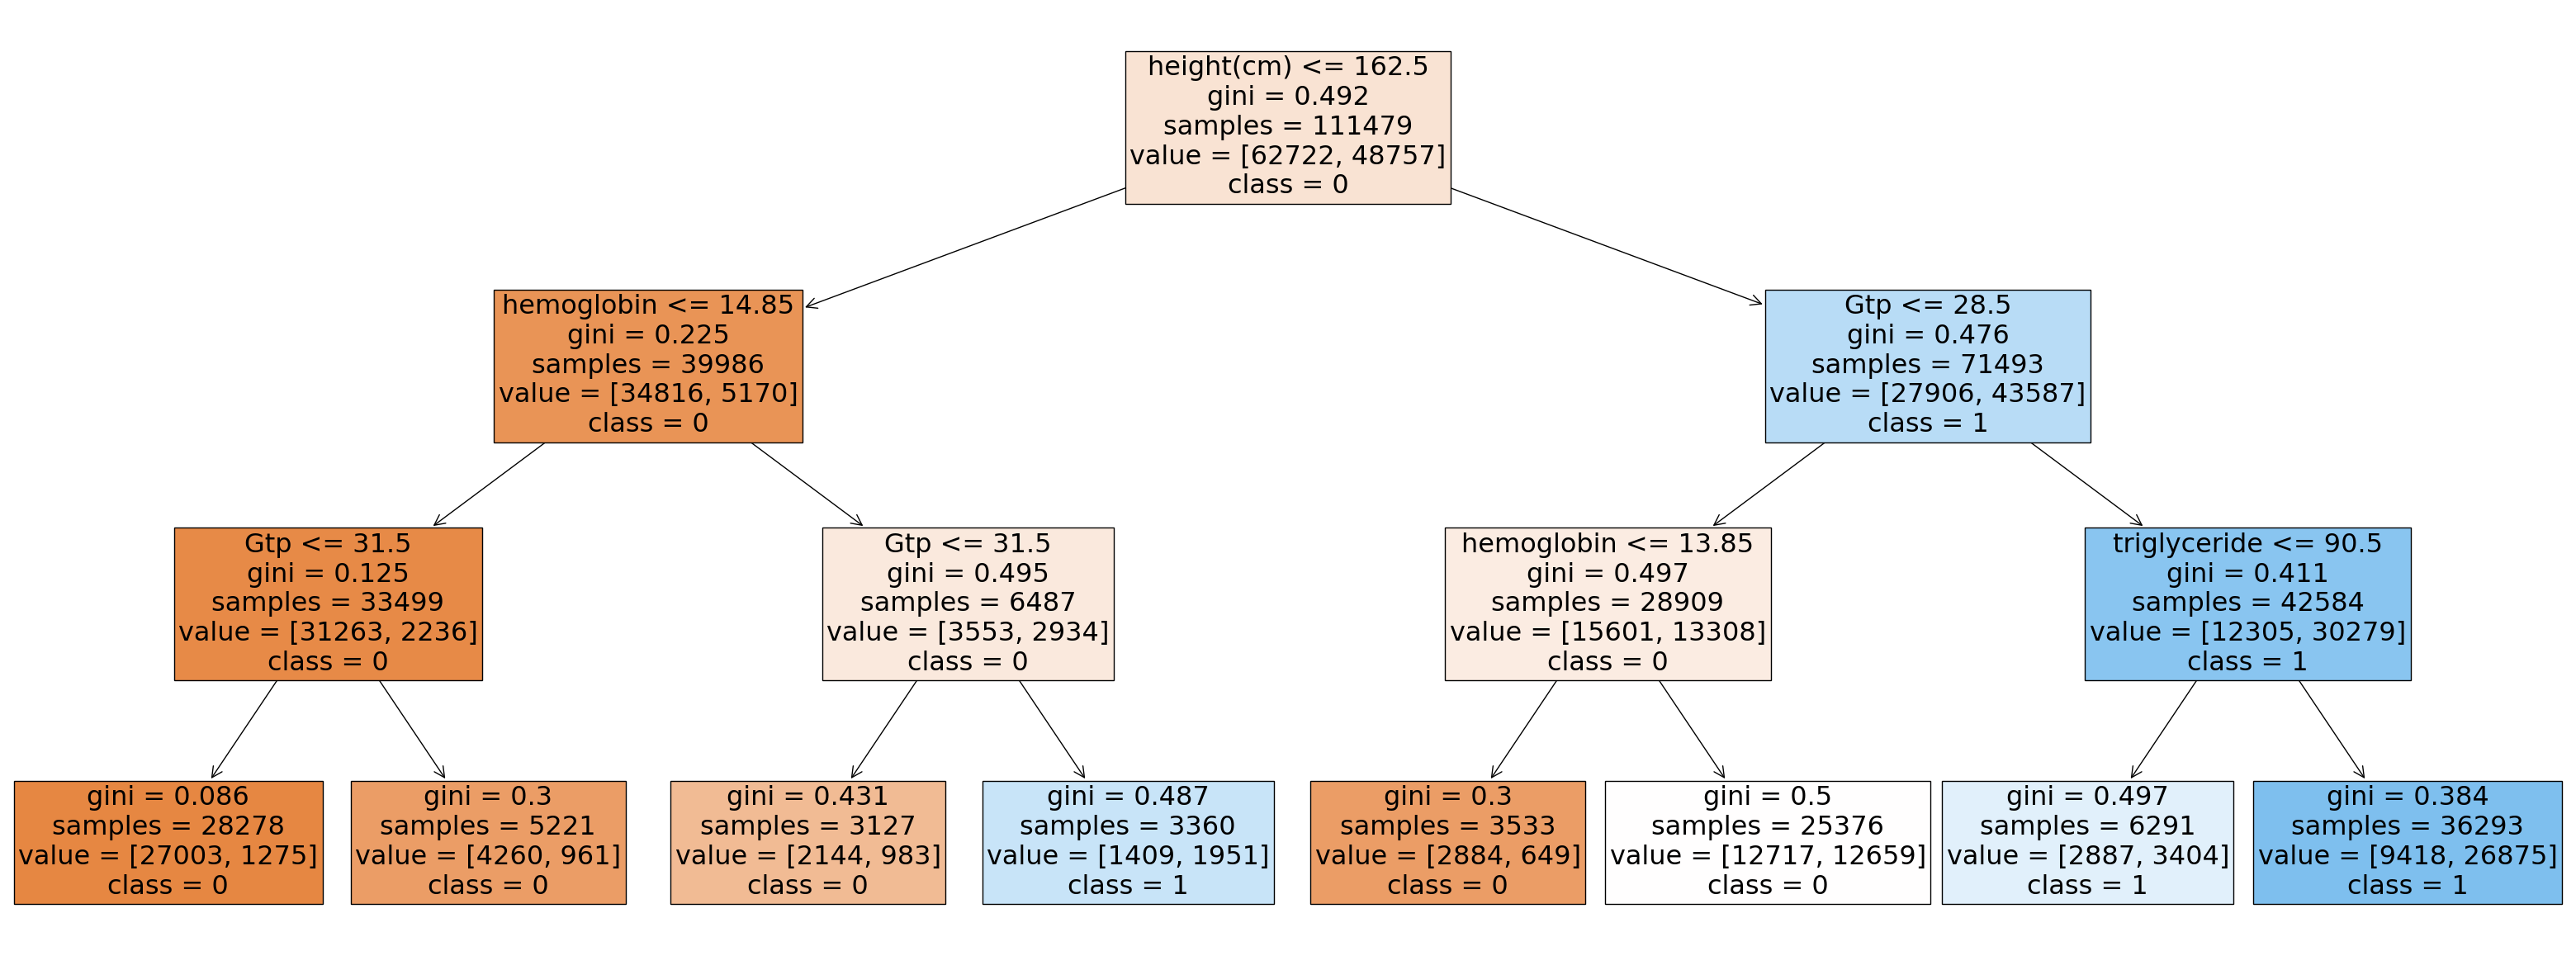

In [4]:
# Create a figure with a larger size to accommodate the tree
plt.figure(figsize=(40, 15))

# Plot the decision tree
# dtc is the trained Decision Tree Classifier model
# feature_names=x_train.columns provides the feature names for the tree
# class_names=['0', '1'] sets the class names for the tree
# filled=True fills the tree nodes with colors
# fontsize=23 sets the font size for the tree
plot_tree(dtc, feature_names=x_train.columns, class_names=['0', '1'], filled=True, fontsize=23)

# Display the plot
plt.show()

# GridSearchCV

In [5]:
# Define the hyperparameter grid for the Decision Tree Classifier
params = {
    'max_depth': [2, 5, 7, 10, 13, None],
    'min_samples_split': [2, 5, 7, 10, 13],
    'min_samples_leaf': [1, 5, 7, 0, 10, 13]
}

# Create a 5-fold cross-validation object with shuffling and a random state of 24
kfold = KFold(n_splits=5, shuffle=True, random_state=24)

# Create a Decision Tree Classifier model with a random state of 24
dtc = DecisionTreeClassifier(random_state=24)

# Create a GridSearchCV object to perform hyperparameter tuning
# dtc is the base estimator
# param_grid=params is the hyperparameter grid to search
# cv=kfold is the cross-validation object
# scoring='roc_auc' is the evaluation metric to use (ROC AUC score)
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='roc_auc')

# Fit the GridSearchCV object to the data
gcv.fit(x, y)

# Print the best hyperparameters found by the grid search
print(gcv.best_params_)

# Print the best score (ROC AUC) achieved by the grid search
print(gcv.best_score_)

{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.8354446574763511


# best tree

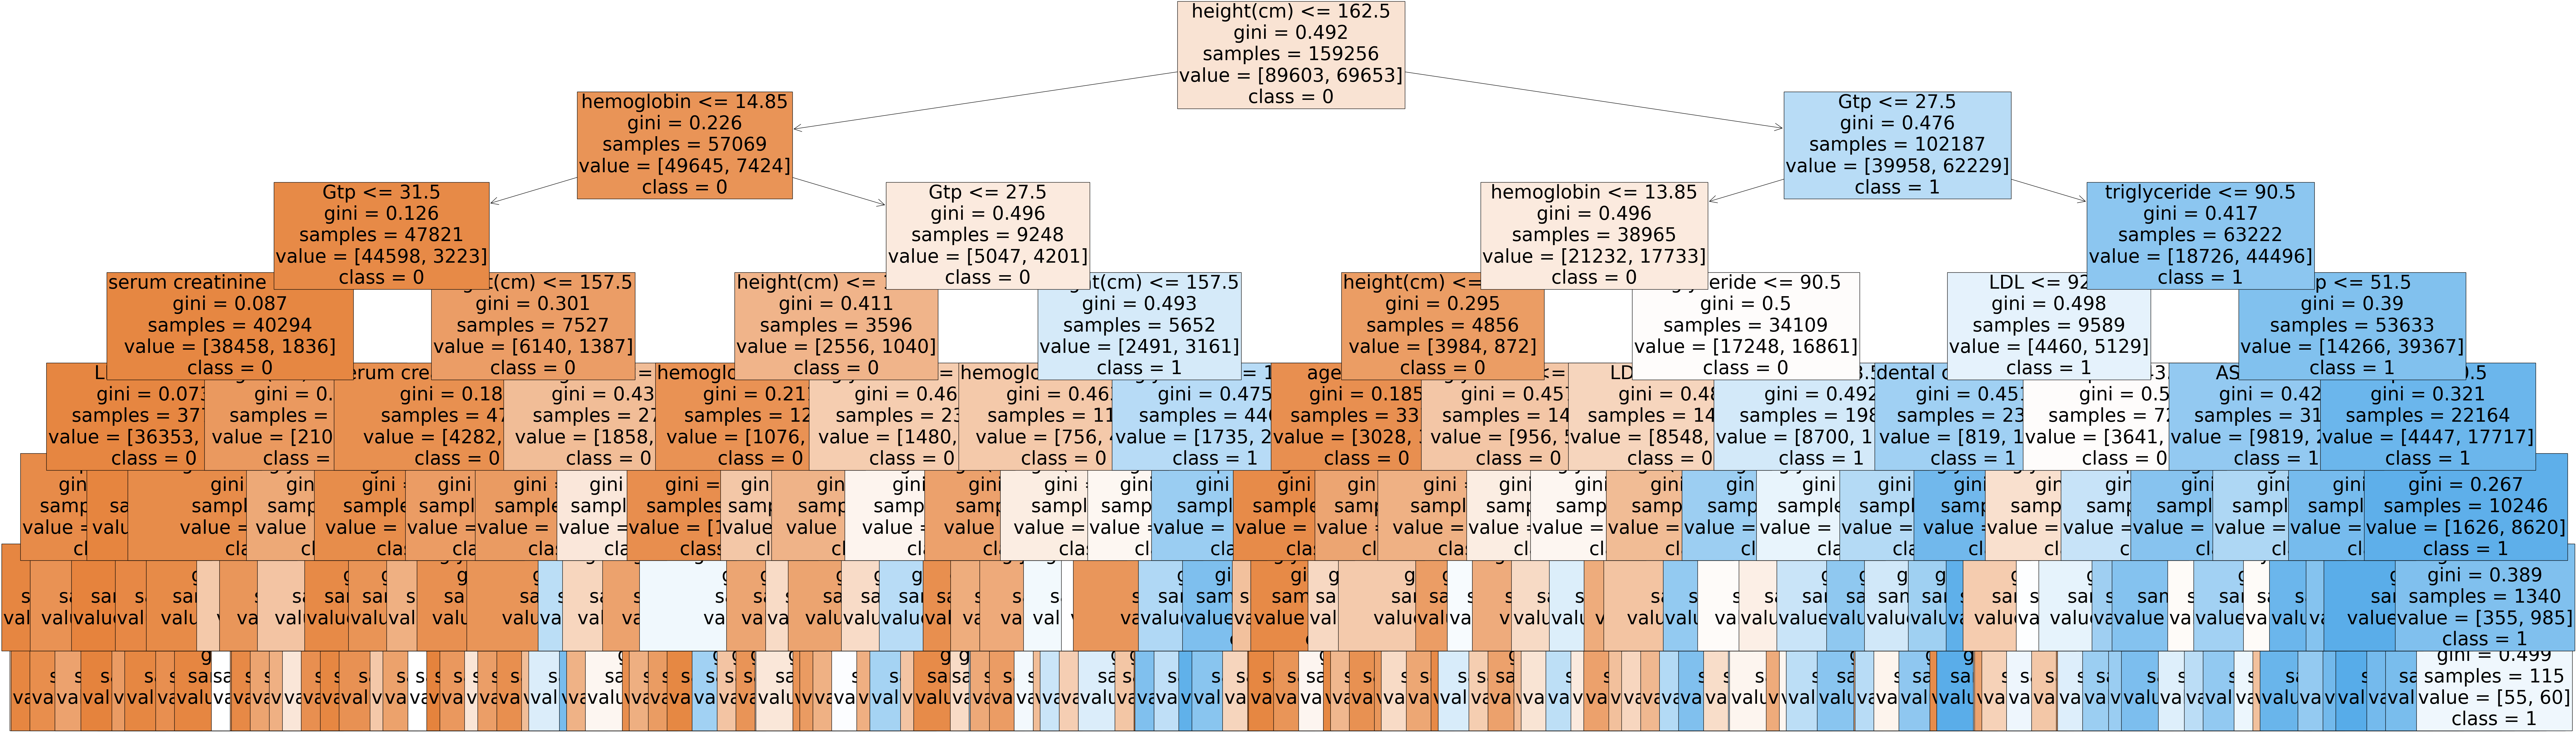

In [6]:
# Get the best estimator (Decision Tree Classifier) from the GridSearchCV object
best_tree = gcv.best_estimator_

# Create a figure with a larger size to accommodate the tree
plt.figure(figsize=(100, 30))

# Plot the best decision tree
# best_tree is the best estimator found by the GridSearchCV
# feature_names=x_train.columns provides the feature names for the tree
# class_names=['0', '1'] sets the class names for the tree
# filled=True fills the tree nodes with colors
# fontsize=43 sets the font size for the tree
plot_tree(best_tree, feature_names=x_train.columns, class_names=['0', '1'], filled=True, fontsize=43)

# Display the plot
plt.show()

# importance chart

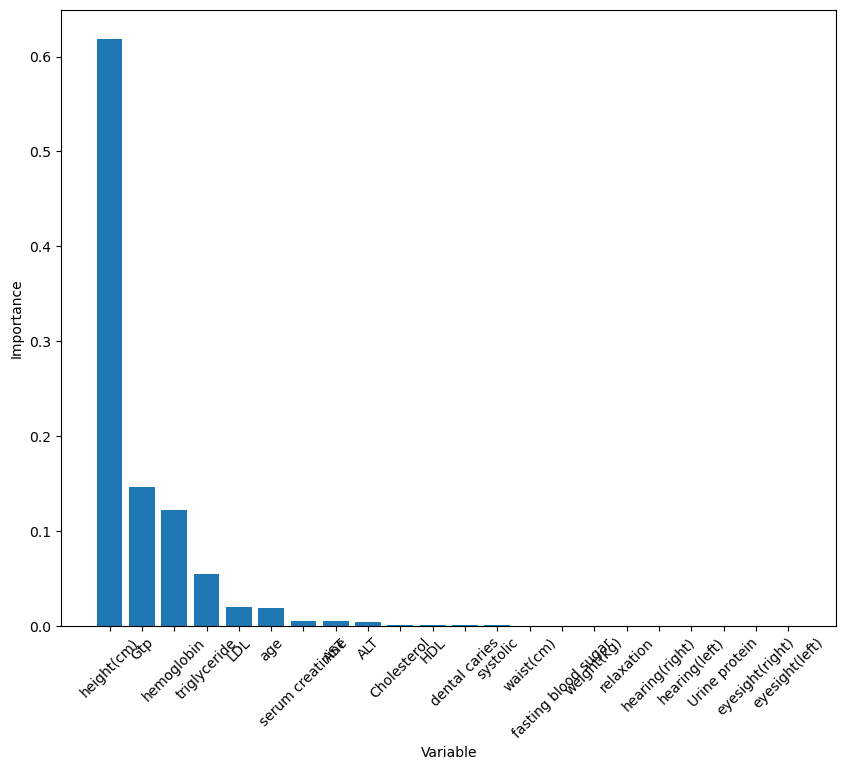

In [7]:
# Create a pandas DataFrame with the feature names and importances
pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_tree.feature_importances_})

# Sort the DataFrame by the feature importances in descending order
pd_imp.sort_values(by='imp', inplace=True, ascending=False)

# Create a vertical bar plot of the feature importances
plt.figure(figsize=(10, 8))
plt.bar(pd_imp['var'], pd_imp['imp'])

# Set the x-axis label
plt.xlabel('Variable')

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Importance')

# Display the plot
plt.show()

# inferencing

In [8]:
best_model = gcv.best_estimator_

# Load the test data into a DataFrame named "test"
test_data = pd.read_csv("test.csv",index_col=0)

pred_smok = best_model.predict(test_data)

# Load the sample submission file into a DataFrame named "submit"
submit = pd.read_csv("sample_submission.csv")

# Replace the predicted smoking values in the submission file
submit['smoking'] = pred_smok

# Save the submission file with the predicted smoking values
submit.to_csv("D:\Kaggle_Compititions\Smoking\playground-series-s3e24\sbt_rg_21_jun.csv", index=False)



# model persisting (joblib)

In [9]:
# Import the necessary module
from joblib import dump

# Dump the best model to a file
dump(best_tree, 'tree_model.joblib')

['tree_model.joblib']